# Benchmark paper experiments 

This notebook contains the code for generating the pictures and graphs for the paper "Waterberry Farms: a realistic benchmark for multi-robot informative path planning"

In [1]:
# allow imports from the main source directory
import sys
sys.path.append('..')
import logging
logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.INFO)
#logging.getLogger().setLevel(logging.INFO)

import pathlib
import pickle
import gzip as compress
import copy
import matplotlib.pyplot as plt
import matplotlib.lines as lines
#import bz2 as compress
import numpy as np

from InformationModel import StoredObservationIM
from WaterberryFarm import create_wbfe, WaterberryFarm, MiniberryFarm, WaterberryFarmInformationModel, waterberry_score, get_datadir
from WbfExperiment import menu

#logging.basicConfig(level=logging.WARNING)
#logging.getLogger().setLevel(logging.INFO)
logging.getLogger().setLevel(logging.WARNING)

# all the experiments results etc. should go into this directory
benchmark_dir = pathlib.Path(get_datadir(), "Benchmark-Paper")
benchmark_dir.mkdir(exist_ok=True)

# One day, multi-value
Performing a set of experiments in the one day multi-value setting for a number of sample policies. 
First we create some helper functions to create the kind of graphs we are interested in. 


In [5]:
def end_of_day_graphs(results, graphfilename = "EndOfDayGraph.pdf"):
    """From the results of a 1 day experiment, create a figure that shows the
    environment, the information model at the end of the scenario, the path of the robot and the evolution of the score"""
    #print(results)
    wbfe = results["wbfe"]
    wbfim = results["wbfim"]
    fig, ((ax_robot_path, ax_env_tylcv, ax_im_tylcv, ax_env_ccr, ax_im_ccr,
    ax_env_soil, ax_im_soil, ax_scores)) = plt.subplots(1, 8, figsize=(18,3))
    fig.suptitle(results["policy"], fontsize=16)

    # visualize the observations, which gives us the path of the robot
    empty = np.zeros_like(wbfe.tylcv.value.T)
    image_env_tylcv = ax_robot_path.imshow(empty, vmin=0, vmax=1, origin="lower", cmap="gray")    
    ax_robot_path.set_title("Robot path")

    obsx = []
    obsy = []
    for obs in results["observations"]:
        obsx.append(obs[StoredObservationIM.X])
        obsy.append(obs[StoredObservationIM.Y])
        old_obs = obs
    ax_robot_path.add_line(lines.Line2D(obsx, obsy, color="red"))

    # visualize the environment for tylcv
    image_env_tylcv = ax_env_tylcv.imshow(wbfe.tylcv.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
    ax_env_tylcv.set_title("TYLCV Environment")
    # visualize the information model for tylcv
    image_im_tylcv = ax_im_tylcv.imshow(wbfim.im_tylcv.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
    ax_im_tylcv.set_title("TYLCV Information model")

    # visualize the environment for ccr
    image_env_ccr = ax_env_ccr.imshow(wbfe.ccr.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
    ax_env_ccr.set_title("CCR Environment")
    # visualize the information model for ccr
    image_im_ccr = ax_im_ccr.imshow(wbfim.im_ccr.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
    ax_im_ccr.set_title("CCR Information model")

    # visualize the environment for soil humidity
    image_env_soil = ax_env_soil.imshow(wbfe.soil.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
    ax_env_soil.set_title("Soil Humidity Environment")
    # visualize the information model for soil humidity
    image_im_soil = ax_im_soil.imshow(wbfim.im_soil.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
    ax_im_soil.set_title("Soil Humidity model")

    ax_scores.plot(results["scores"])
    ax_scores.set_ylim(top=0)
    ax_scores.set_xlabel("Time")
    ax_scores.set_ylabel("Score")
    ax_scores.set_title("Scores")
    fig.tight_layout()
    plt.savefig(pathlib.Path(benchmark_dir, graphfilename))



### Run the one day multi-value experiments
This code it trying to avoid to re-run the experiments that had already been run.

In [6]:
default_choices = {"geometry": "Miniberry-30", "action": "run", "scenario": "one-day-single-value", "visualize": 0,  "result-basedir": benchmark_dir}
default_choices["velocity"] = 1
default_choices["timesteps_per_day"] = 1000
default_choices["time_start_environment"] = 6

# if force_run is false, we do not re-run an already run policy 
force_run = False
policies = ["benchmarkpaper-randomwaypoint", 
"benchmarkpaper-lawnmower", "benchmarkpaper-spiral", "benchmarkpaper-adaptive-lawnmower"]
for policy in policies:
    print(policy)
    # do a dryrun, to get the path to the cached values
    choices = copy.copy(default_choices)
    choices["policy"] = policy
    choices["dryrun"] = True
    results = menu(choices)
    path = results["results_path"]
    print(path)
    if not path.exists() or force_run:
        choices["dryrun"] = False
        results = menu(choices)

benchmarkpaper-randomwaypoint
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-randomwaypoint
benchmarkpaper-lawnmower
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-lawnmower
benchmarkpaper-spiral
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-spiral
benchmarkpaper-adaptive-lawnmower
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-adaptive-lawnmower


/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-spiral
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-adaptive-lawnmower
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-randomwaypoint
/home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Benchmark-Paper/res-pol_benchmarkpaper-lawnmower


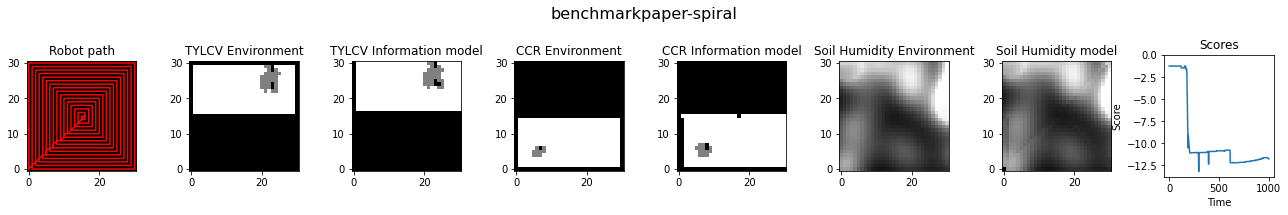

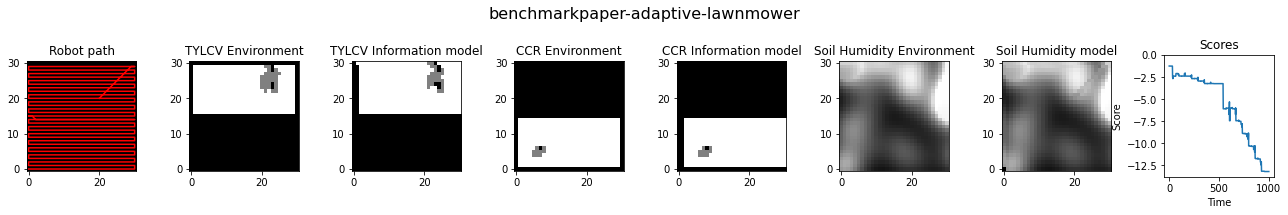

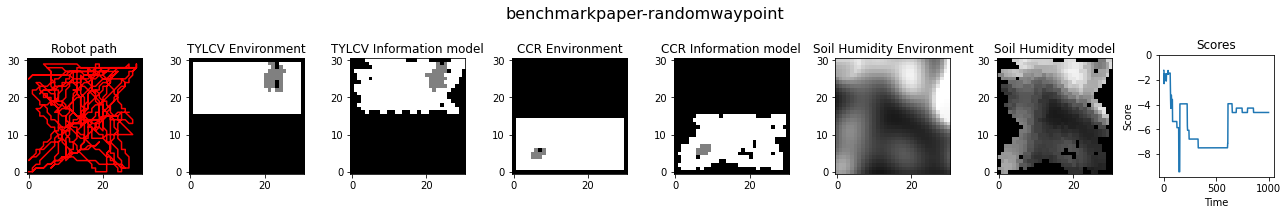

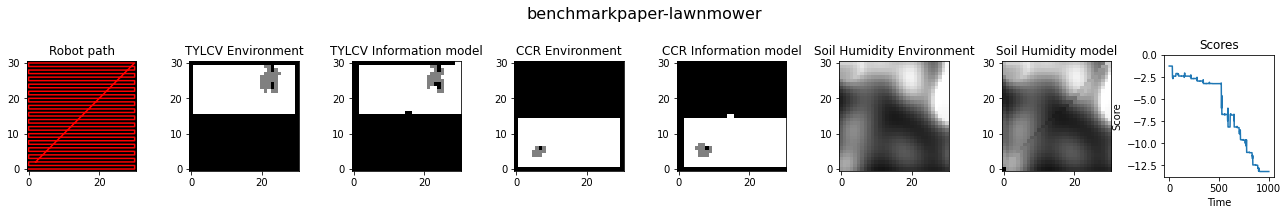

In [10]:
# gather all the results, and plot them
allresults = []
for a in benchmark_dir.iterdir():
    if a.name.startswith("res-pol_benchmarkpaper-"):
        print(a)
        with compress.open(a, "rb") as f:
            results = pickle.load(f)
            end_of_day_graphs(results, f"daily-summary-{results['policy']}.pdf")
            allresults.append(results)

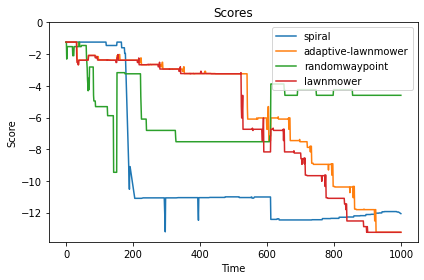

In [21]:
fig, ax_scores = plt.subplots(1, figsize=(6,4))
for results in allresults:
    ax_scores.plot(results["scores"], label = results["policy"][len("benchmarkpaper-"):])
ax_scores.set_ylim(top=0)
ax_scores.set_xlabel("Time")
ax_scores.set_ylabel("Score")
ax_scores.set_title("Scores")
ax_scores.legend()
fig.tight_layout()


# Precompute environments
* Precompute the evaluation of the environments. This allows the following simulations to run faster and to use the same environment for different path planning algorithms. 
* The precomputed data is saved into the corresponding directory under __Temporary/2022-01-15-MREM_data. __Delete that directory if you want to run the simulation with a differently parameterized environments.__
* This precalculates 50 days of evolution for all four environments. This is sufficient for the standard benchmark settings. 
* As this simulation is expensive for the large environments, be patient, it takes about __30 minutes__ on a fast machine. 


In [3]:
precompute = 50
typenames = ["Miniberry-10", "Miniberry-30", "Miniberry-100", "Waterberry"]
# typenames = ["Miniberry-10","Miniberry-30", "Miniberry-100",]
# typenames = ["Waterberry"]
# typenames = ["Miniberry-100"]
for typename in typenames:
    menu({"geometry": typename, "action": "precompute-environment", "precompute-time": precompute})

# Generate pictures for the Waterberry farms geometry. 
Generates pictures for the geometry of the various benchmark configurations (Miniberry-10,30,100 and Waterberry), and saves them into files $data/geometry_Miniberry-10.pdf etc.

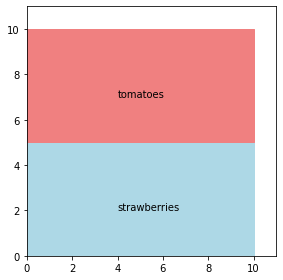

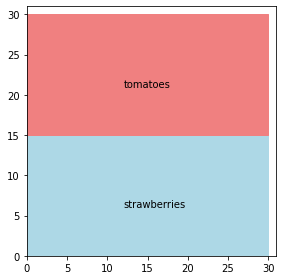

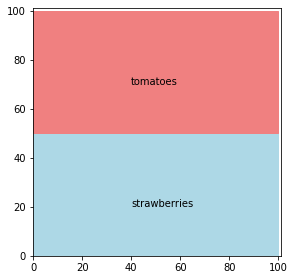

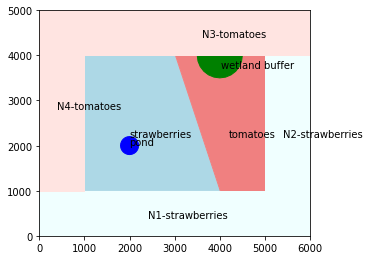

In [14]:
typenames = ["Miniberry-10", "Miniberry-30", "Miniberry-100", "Waterberry"]
timepoints = [1, 3, 5, 10]
# typename = "Miniberry-10"

for typename in typenames:
    _, wbfe, _ = create_wbfe(saved = True, wbf_prec = None, typename = typename)
    geom = wbfe.geometry
    fig, ax = plt.subplots(1, figsize=(5,4))
    wbfe.geometry.visualize(ax)
    fig.tight_layout()
    plt.savefig(pathlib.Path(benchmark_dir, f"geometry_{typename}.pdf"))
    plt.savefig(pathlib.Path(benchmark_dir, f"geometry_{typename}.jpg"))

# Evolution of the environments at a list of specific timepoints

Generates figures for the state of the environment components at various timepoints. The default timepoints are the 1, 5, 10, 15 that are good for visualizing what goes on in the multiday experiments. 

The results are saved into $data/env-dynamics-{typename}-{value} files.

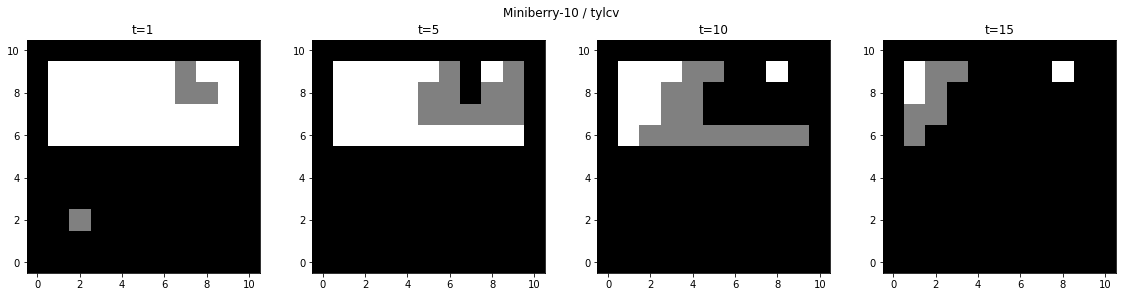

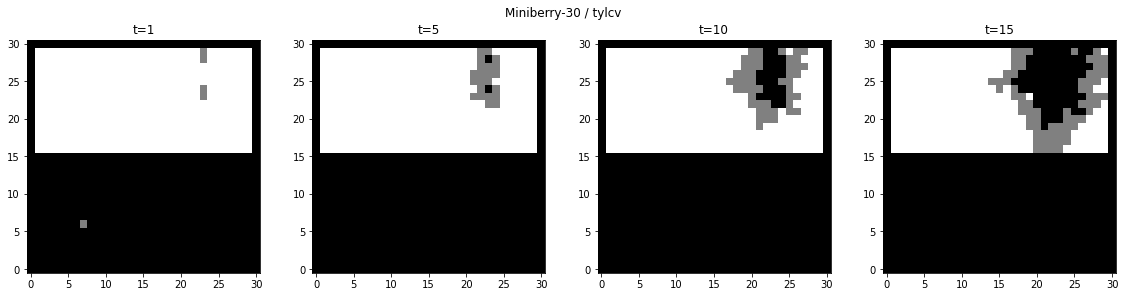

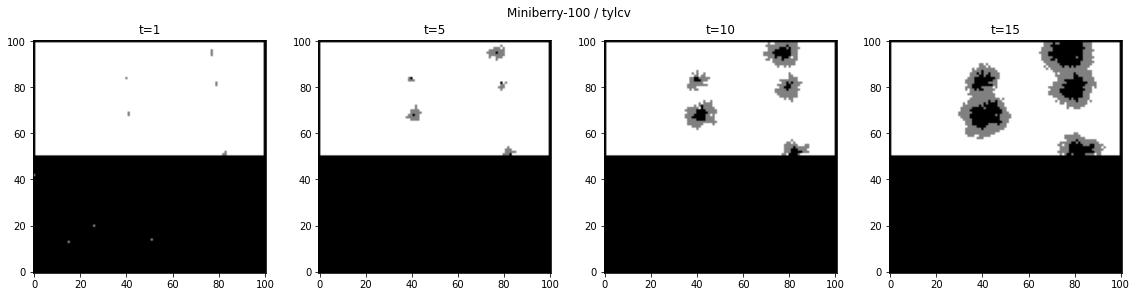

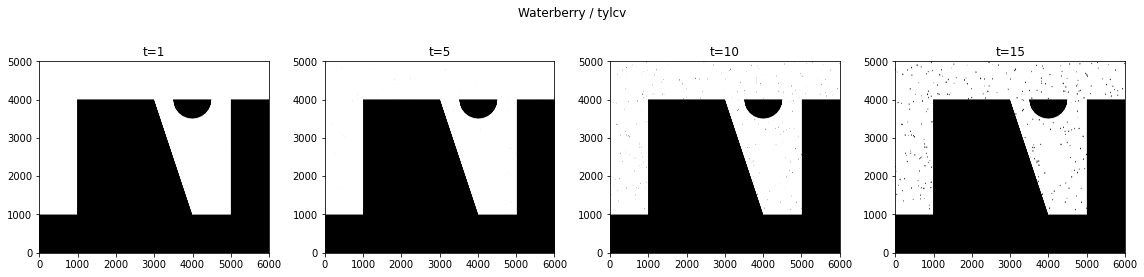

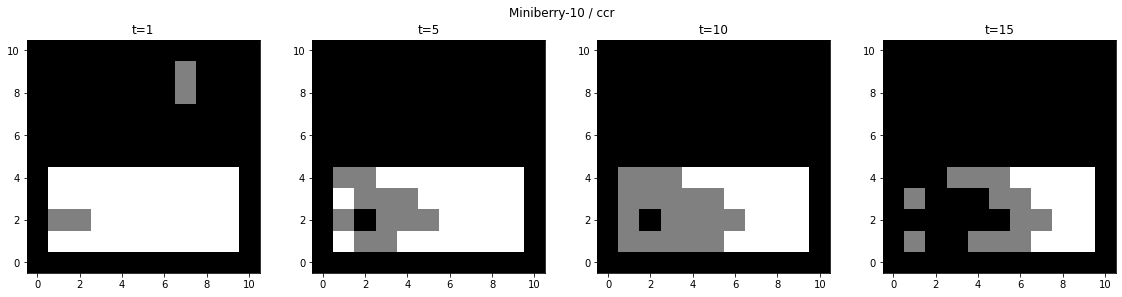

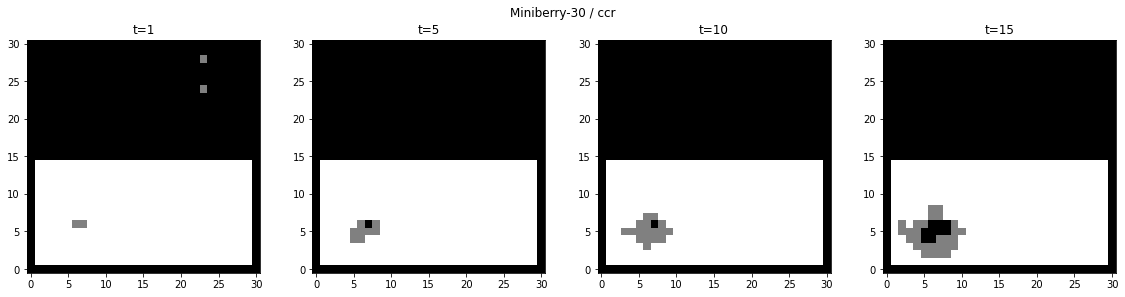

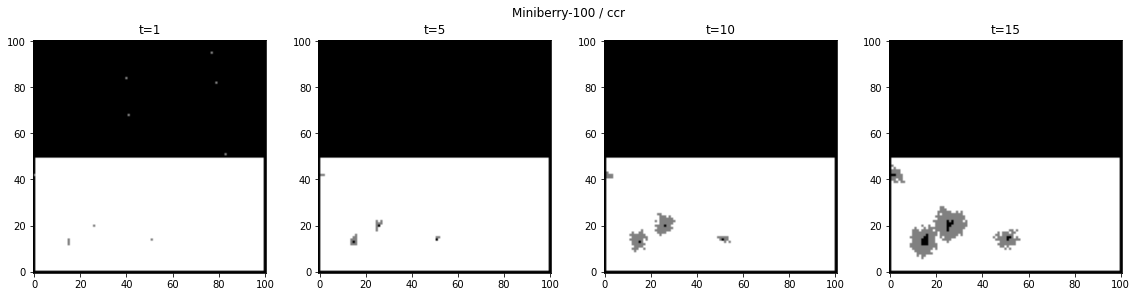

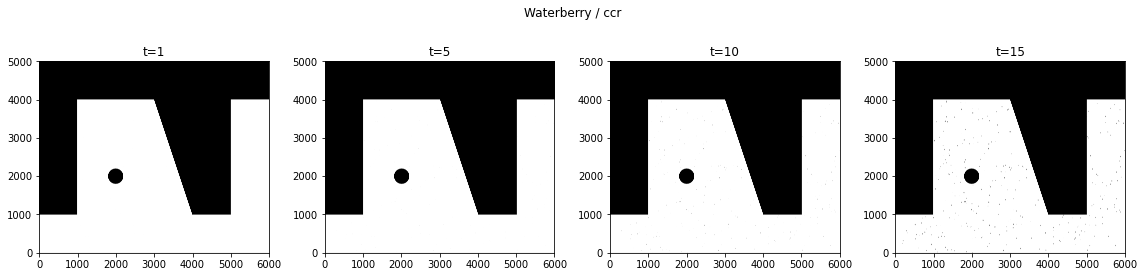

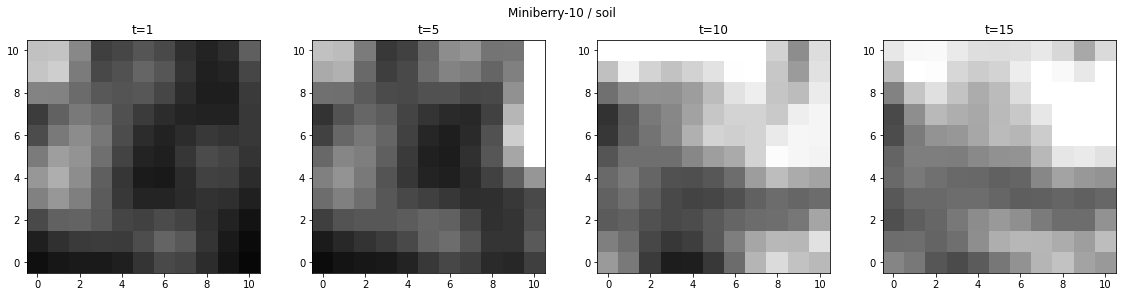

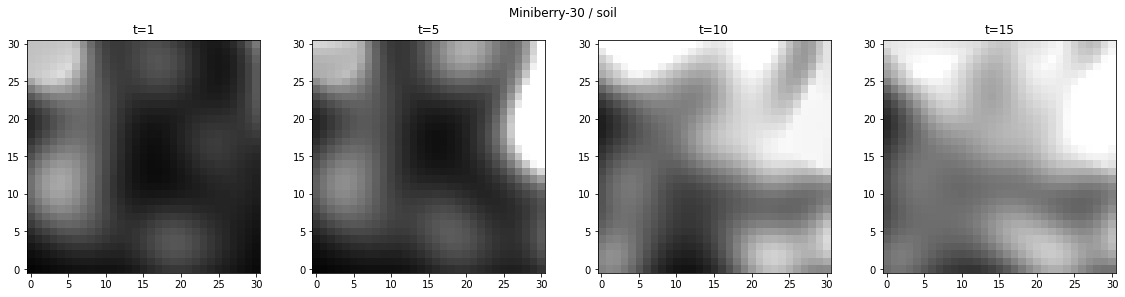

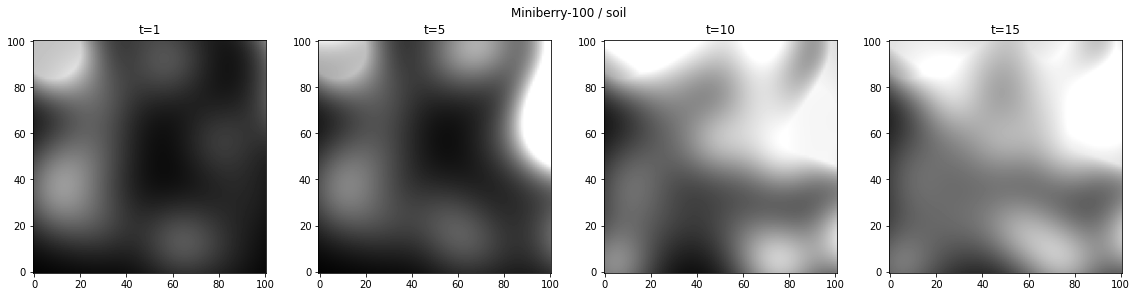

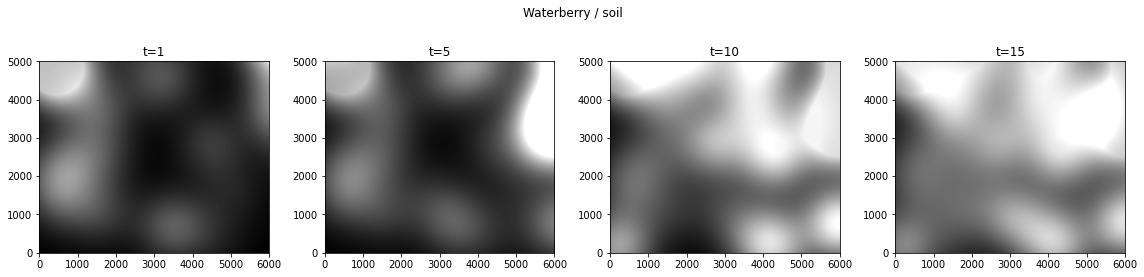

In [17]:
typenames = ["Miniberry-10", "Miniberry-30", "Miniberry-100", "Waterberry"]
values = ["tylcv", "ccr", "soil"]
timepoints = [1, 5, 10, 15]

for value in values:
    for typename in typenames:
        _, wbfe, _ = create_wbfe(saved = True, wbf_prec = None, typename = typename)
        fig, axs = plt.subplots(1, len(timepoints), figsize = (4 * len(timepoints), 4))
        fig.suptitle(f"{typename} / {value}")
        ntt = 0
        for t in range(timepoints[-1]+1):
            if t >= timepoints[ntt]:
                if value == "tylcv":
                    val = wbfe.tylcv.value
                elif value == "ccr":
                    val = wbfe.ccr.value
                elif value == "soil":
                    val = wbfe.soil.value
                axs[ntt].imshow(val.T, vmin=0, vmax=1, cmap="gray", origin="lower")
                axs[ntt].set_title(f"t={timepoints[ntt]}")
                ntt = ntt + 1
            wbfe.proceed()
        fig.tight_layout()
        plt.savefig(pathlib.Path(benchmark_dir, f"env-dynamics-{typename}-{value}.pdf"))
        plt.savefig(pathlib.Path(benchmark_dir, f"env-dynamics-{typename}-{value}.jpg"))



# Single day, single robot, multi-value experiment for a given policy
* The results will be saved into `2022-01-15-MREM_data/Miniberry-10/res_pol#`
    * The # is the policy number, see in 
* The policy # followed by the robot is determined in the WbfExperiment.menu function, search for ROBOT AND POLICY SPECIFICATION
* In its current form, this call forces the experiment to be run and it ends up writing the result

INFO:root:loading the geometry and environment from saved data
INFO:root:loading done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_tylcv/env_value_00006.bz2
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_tylcv/env_value_00006.bz2 done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_ccr/env_value_00006.bz2
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_ccr/env_value_00006.bz2 done
INFO:root:Environment.proceed - calling the inner_proceed
INFO

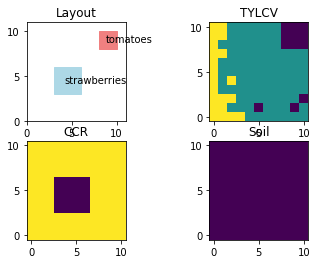

In [ ]:
desc = {}

results = menu({"geometry": 1, "action": 4, "scenario": 1, "visualize": 0, "time_start_environment": 6, "policy": 1, "policy_description": desc})


# Multi-day multi-value experiments
Run the multi-day multi-value experiments. 

In [ ]:
results.keys()

dict_keys(['typename', 'time_start_environment', 'wbf', 'wbfe', 'scenario', 'days', 'values', 'robot', 'velocity', 'timespan', 'policy', 'oneshot', 'wbfim', 'score', 'scores', 'observations', 'positions'])

In [ ]:
print(results["choices"])

{'geometry': 1, 'action': 4, 'scenario': 1, 'visualize': 0, 'time_start_environment': 6, 'policy': 1}


# Process all the experiments and generate a comparative graph of the evolution of the score.

In [ ]:
# FIXME: this relies on getting the path from results, but it should be runnable even if we had not run an experiment
p = pathlib.Path(results["savedir"])
allresults = []
for a in p.iterdir():
    if a.name.startswith("res-"):
        with compress.open(a, "rb") as f:
            results = pickle.load(f)
            allresults.append(results)

NameError: name 'pathlib' is not defined

In [ ]:
allresults

[{'choices': {'geometry': 1,
   'action': 4,
   'scenario': 1,
   'visualize': 0,
   'time_start_environment': 6,
   'policy': 2},
  'typename': 'Miniberry-10',
  'time_start_environment': 6,
  'wbf': <WaterberryFarm.MiniberryFarm at 0x7f1930bd8a90>,
  'wbfe': <WaterberryFarm.WaterberryFarmEnvironment at 0x7f1930b47a00>,
  'savedir': PosixPath('/home/lboloni/Documents/HackingWork/__Temporary/2022-01-15-MREM_data/Miniberry-10'),
  'scenario': 1,
  'days': 1,
  'values': 'single',
  'robot': <Robot.Robot at 0x7f19309a8400>,
  'velocity': 1,
  'timespan': 40.0,
  'policy': 'lawnmower-restart',
  'oneshot': False,
  'wbfim': <WaterberryFarm.WaterberryFarmInformationModel at 0x7f19309b42e0>,
  'score': -1.7000000000000002,
  'scores': [-12.7,
   -13.2,
   -13.15,
   -13.15,
   -3.15,
   -3.15,
   -3.15,
   -3.15,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.650000

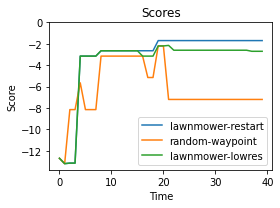

In [ ]:
fig, ax_scores = plt.subplots(1, figsize=(4,3))
for results in allresults:
    ax_scores.plot(results["scores"], label = results["policy"])
ax_scores.set_ylim(top=0)
ax_scores.set_xlabel("Time")
ax_scores.set_ylabel("Score")
ax_scores.set_title("Scores")
ax_scores.legend()
fig.tight_layout()


## Perform a precalculation of the environment